# **Ensemble Learning**
_____

In this notebook, **Ensemble Learning** will be explored in various ways using the **Texas Weather** dataset in oder to achieve some understanding of this supervised machinle learning algorithm.

### **Objectives :**

- Comprehend the basic concept of Ensemble Learning.
- Peform data exploration and visualization.
- Explore popular ensemble techniques like **Bagging**, **Boosting**, and **Stacking**
- Build Ensemble Learning model for for temperature level classification.

______

## **What is Ensemble Model ?**

 Ensemble learning is a machine learning technique that generates a more accurate, reliable, and broadly applicable result than any one model could create alone.
 Similar to gathering several opinions before making a critical choice, the theory is that while individual models may make mistakes, combining their outputs can eliminate errors and improve performance.

____ 

## **Data Exploration**

The Texas Weather dataset shall be the main and only dataset for this notebook. In this section various techniques shall be implemented to explore and gain some insights into the data.

### Import Required Libraries

In [50]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [51]:
import sys
import os

# Get absolute path of the folder 
sl_folder = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Adding folder to sys.path
sys.path.insert(0, sl_folder)

# Import function
from security import suppress_stderr


### Load Data

In [52]:
df = pd.read_csv('../../weather_data.csv')

df.head()

,date,max_temp,min_temp,humidity,wind_speed,precipitation,pressure,solar_radiation
0,2019-01-01,87.5,59.5,67.2,8.3,0.07,1013.2,273.3
1,2019-01-02,84.7,72.4,75.4,10.8,0.14,1013.6,265.2
2,2019-01-03,88.9,65.2,79.2,12.2,0.07,1011.0,312.8
3,2019-01-04,93.6,66.1,75.2,13.0,0.05,1014.4,232.4
4,2019-01-05,85.2,69.9,70.0,10.2,0.05,1013.2,280.9


### List the Columns in the Dataset

In [53]:
df.columns

Index(['date', 'max_temp', 'min_temp', 'humidity', 'wind_speed',
       'precipitation', 'pressure', 'solar_radiation'],
      dtype='object')

### Number of data in each column

In [54]:
df.isnull().count()

date               1826
max_temp           1826
min_temp           1826
humidity           1826
wind_speed         1826
precipitation      1826
pressure           1826
solar_radiation    1826
dtype: int64

### Checking the Data Types in Each Column

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1826 non-null   object 
 1   max_temp         1826 non-null   float64
 2   min_temp         1826 non-null   float64
 3   humidity         1826 non-null   float64
 4   wind_speed       1826 non-null   float64
 5   precipitation    1826 non-null   float64
 6   pressure         1826 non-null   float64
 7   solar_radiation  1826 non-null   float64
dtypes: float64(7), object(1)
memory usage: 114.2+ KB


There is an object type in the dataset. This could be a problem later. Let's change it to an appropriate datetime format

_____

## **Data Cleaning**

This step is very important in order to make sure the data is in the best shape for analysis and model development

### Correcting Data Type

In [56]:
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1826 non-null   datetime64[ns]
 1   max_temp         1826 non-null   float64       
 2   min_temp         1826 non-null   float64       
 3   humidity         1826 non-null   float64       
 4   wind_speed       1826 non-null   float64       
 5   precipitation    1826 non-null   float64       
 6   pressure         1826 non-null   float64       
 7   solar_radiation  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 114.2 KB


### Checking for Null values

In [57]:
df.isnull().sum()

date               0
max_temp           0
min_temp           0
humidity           0
wind_speed         0
precipitation      0
pressure           0
solar_radiation    0
dtype: int64

No null values present

### Checking for duplicates

In [58]:
duplicates = df.duplicated().sum()
print(f"Duplicates in the dataset: {duplicates}")

Duplicates in the dataset: 0


______

## **Feature Distribution and Data Visualisations**

In this section, graphs and plots shall be used to analyze the data to gain deeper insights.

### **Class Distribution of Temperature Levels**

The aim of this plot is to show how balanced temperature levels are accordind to the daily maximum and minimum temperature(both in degree Farenheit). In order to do this, first a column for temperature levels needs to exist,and it will be the average temperature of that day.


In [59]:
# daily average temperature
df['avg_temp'] = (df['max_temp'] + df['min_temp']) / 2

# Classify into temperature levels according to farrenheit scale
def temp_category_f(temp):
    if temp < 60:
        return 'cold'
    elif temp < 75:
        return 'warm'
    else:
        return 'hot'

df['temp_level'] = df['avg_temp'].apply(temp_category_f)

The column for temp_level exists now. However let us see what kind of values are there.

In [60]:
df.head()

,date,max_temp,min_temp,humidity,wind_speed,precipitation,pressure,solar_radiation,avg_temp,temp_level
0,2019-01-01,87.5,59.5,67.2,8.3,0.07,1013.2,273.3,73.50,warm
1,2019-01-02,84.7,72.4,75.4,10.8,0.14,1013.6,265.2,78.55,hot
2,2019-01-03,88.9,65.2,79.2,12.2,0.07,1011.0,312.8,77.05,hot
3,2019-01-04,93.6,66.1,75.2,13.0,0.05,1014.4,232.4,79.85,hot
4,2019-01-05,85.2,69.9,70.0,10.2,0.05,1013.2,280.9,77.55,hot


### The Distribution of Temperature Graph

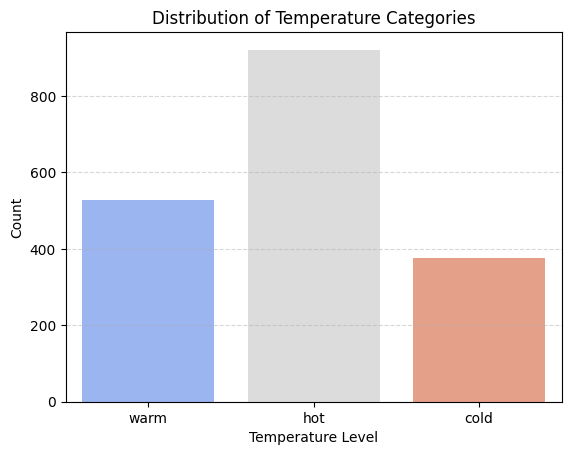

In [61]:
with suppress_stderr():

    # Ploting  distribution of temp_level categories
    sb.countplot(data=df, x='temp_level', palette='coolwarm')

    plt.title('Distribution of Temperature Categories')
    plt.xlabel('Temperature Level')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


**Interpretation of the Graph**

- With a count of about 900, the hot category appears most frequently, which shows that high temperature levels are a lot in the dataset.

- Roughly 450 cases, the warm group comes next, suggesting a fairly mild occurrence.

- With about 400 occurrences, the cold category is the least frequent, suggesting that colder temperatures are less usual.

Conclusion: The distribution implies that hot temperatures are substantially more common than both mild and cold temperatures, which could point to a seasonal trend in the environment.


____

### **Humidity Distribution Across Temperature Categories**

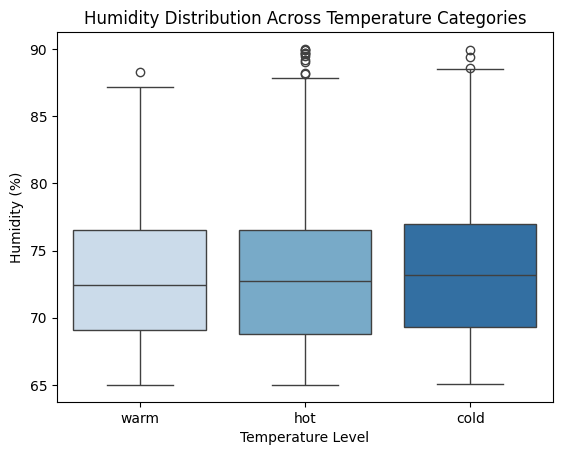

In [62]:
with suppress_stderr():

    sb.boxplot(data=df, x='temp_level', y='humidity', palette='Blues')
    plt.title('Humidity Distribution Across Temperature Categories')
    plt.xlabel('Temperature Level')
    plt.ylabel('Humidity (%)')
    plt.show()

**Interpretation of Graph**

- The majority of values lie between 72 and 75%, which is the median the middle value for all three categories.

- All temperature groups show similar variability in humidity, as seen by the interquartile range (IQR), which is the spread of the middle 50% of data.

- There are outliers, or data points that deviate greatly from the norm. There is one outlier above 85% in the warm group. There are multiple outliers in the hot group that are higher than 85%, suggesting that humidity varies more at higher temperatures.

Cnonclusion: The main conclusion is that while humidity levels are generally constant across temperature ranges, severe humidity values, particularly at hot temperatures occur more frequently, with the hot temperature level showing the greatest fluctuation.
____

## **Temperature Level Classification**

In this section an Ensemble Model will be built to peform a classification task of predicting temperature levels. It will be built incorporating the **The Ensemble Learning Pipelines** to develop this model. The math and logic behind each of them shall also be explored. This would provide a greater understanding to the topic and the code below.

### **The Ensemble Learning Pipelines**

The Ensemble Learning Pipeline is the step-by-step process of preparing data, training multiple models, and combining their predictions to improve accuracy and robustness.
It includes data preprocessing and model training like; **Bagging, Boosting or Stacking** and final evaluation using the common evaluation metrics like accuracy or F1-score. For this section, let us look at the Ensemble Learning pipeline according to this taskand code below that was used to achieve it.





In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Compute average temp
df['avg_temp'] = (df['max_temp'] + df['min_temp']) / 2

# Categorize temperature levels 
def temp_category_f(temp):
    if temp < 60:
        return 'cold'
    elif temp < 75:
        return 'warm'
    else:
        return 'hot'

df['temp_level'] = df['avg_temp'].apply(temp_category_f)

# Encode labels
le = LabelEncoder()
df['temp_label'] = le.fit_transform(df['temp_level'])

# Select features
features = ['humidity', 'wind_speed', 'precipitation', 'pressure', 'solar_radiation']
X = df[features]
y = df['temp_label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### **Bagging (with Random Forest Classifier)**

Bagging trains multiple models on random subsets of the dataset with replacement, then it votes on their predictions. It is excellent at lowering variance, which increases the stability of forecasts.

#### What Random Forest Does:

- It builds many decision trees using bagged samples.

- Each tree votes on the final prediction.


#### The Math Behind Bagging (according to the code)

The idea is to train many models on different random subsets of data (with replacement), then average or vote on predictions.

**Here is the mathematical expression for the classification :**

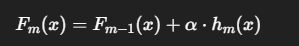

Where 
𝑀
𝑖
(
𝑥
)
M 
i
​
 (x) is the prediction from model 
𝑖
i on input 
𝑥
x

**Why it Works:**

- It reduces variance.

- It improves generalization.



In [64]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print(" Random Forest (Bagging):")
print(classification_report(y_test, rf_preds, target_names=le.classes_))


 Random Forest (Bagging):
              precision    recall  f1-score   support

        cold       0.72      0.77      0.75        84
         hot       0.94      0.93      0.94       181
        warm       0.68      0.65      0.67       101

    accuracy                           0.82       366
   macro avg       0.78      0.79      0.78       366
weighted avg       0.82      0.82      0.82       366



#### **Boosting (with Gradient Boosting Classifier)**

Boosting builds models in a step-by-step fashion, with each new model concentrating on correcting the errors of its predecessors. It all comes down to lessening bias and assisting the model in learning even the most challenging situations. On their own, each learner is not strong enough but when they work together, they become much stronger.

#### What Gradient Boosting Does:

- The first model makes a prediction.

- The second model predicts what the first got wrong (which is the residual).

- The third model predicts what both got wrong, and it goes on as so.

These are added together (not voted) to form the final output.

#### The Math Behind Boosting (according to the code)

The idea is to train models step-by-step, where each new model tries to fix the errors of the previous one.

**Here is the mathematical expression :**

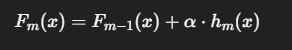

Whereby :

- 𝐹
𝑚
(
𝑥
)
F 
m
​
 (x): the ensemble model at iteration 
𝑚
m
 
- ℎ
𝑚
(
𝑥
)
h 
m
​
 (x): a weak model trained to predict the residuals (errors)

-  𝛼
α: learning rate

**Why it Works:**

- It focuses on the hardest cases step-by-step to reduce bias





In [65]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

print(" Gradient Boosting:")
print(classification_report(y_test, gb_preds, target_names=le.classes_))


 Gradient Boosting:
              precision    recall  f1-score   support

        cold       0.68      0.71      0.70        84
         hot       0.95      0.94      0.95       181
        warm       0.65      0.63      0.64       101

    accuracy                           0.81       366
   macro avg       0.76      0.76      0.76       366
weighted avg       0.81      0.81      0.81       366



#### **Stacking (with Stacking  Classifier)**

Stacking combines multiple different models (called base learners) and uses a meta-model to learn how to best combine their outputs. The base learners make independent predictions.Those predictions become features for the meta-model. The met-model then learns when to trust model.


#### How it is Used :

- Base learners make independent predictions.

- The meta-model which in this case is a GradientBoostingClassifier

For example; It learns that Random Forest might be better at identifying "hot" while Logistic Regression is better at handling "cold" — and cleverly combines the two.

#### The Math Behind Stacking (according to the code)

Let's say;

- h 
1
​
 (x),h 
2
​
 (x),...,h 
k
​
 (x): predictions from base models

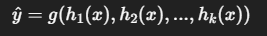 

Where 
𝑔
g is the meta-model (like GradientBoosting or LogisticRegression)

The idea is to train several models (base learners) in parallel and use another model (meta-learner) to learn how to combine them.



**Why it Works:**

- It learns to weigh each model’s strength based on the input





In [66]:
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

meta_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stack_model.fit(X_train, y_train)
stack_preds = stack_model.predict(X_test)

print(" Stacking Ensemble:")
print(classification_report(y_test, stack_preds, target_names=le.classes_))


 Stacking Ensemble:
              precision    recall  f1-score   support

        cold       0.73      0.76      0.74        84
         hot       0.92      0.93      0.93       181
        warm       0.67      0.63      0.65       101

    accuracy                           0.81       366
   macro avg       0.77      0.78      0.78       366
weighted avg       0.81      0.81      0.81       366



### **Visualisation of Peformance Comparison**

In order to get a clearer understanding of the performance of the models and their accuracies, Cross Validation is used to derive the accuracy accross folds for each model. This is plotted on to a bar chart.

In [67]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define models with names
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Stacking Ensemble': StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('lr', LogisticRegression(max_iter=1000, random_state=42)),
            ('knn', KNeighborsClassifier(n_neighbors=5))
        ],
        final_estimator=GradientBoostingClassifier(n_estimators=100, random_state=42)
    )
}

# Collect cross-validated scores
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()


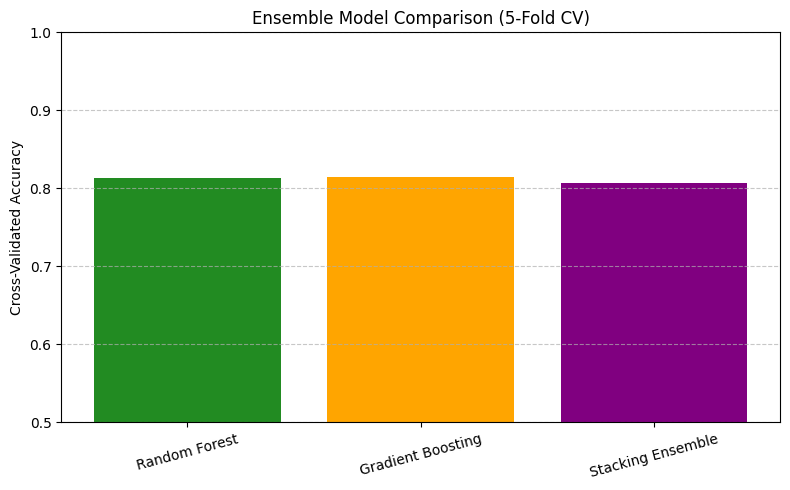

In [68]:
# Plot model comparison
plt.figure(figsize=(8, 5))
plt.bar(cv_scores.keys(), cv_scores.values(), color=['forestgreen', 'orange', 'purple'])
plt.ylabel('Cross-Validated Accuracy')
plt.title('Ensemble Model Comparison (5-Fold CV)')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Interpretation of the Graph**

- The accuracy values of Random Forest (green), Gradient Boosting (orange), and Stacking Ensemble (purple) are comparable, averaging about 0.8.

- In comparison to the other models, the Stacking Ensemble model seems to be a little more accurate.

All three models function reasonably well because the accuracy levels are rather near, thus depending on your particular use case, any of them might be feasible.

_______

## **Conclusion and Final Notes**

In this notebook, an Ensemble Learning model was built with Bagging (Random Forest), Boosting (Gradient Boosting), and Stacking, to categorize temperature levels (cold, warm, and hot) and using Texas meteorological data, we investigated Temperature levels.  Each ensemble method's mathematical intuition was investigated, Scikit-learn was used to implement it, and cross-validation and visualization were used to compare its performance.

### Final Notes

- The dataset was preprocessed to create a new column called avg_temp feature and categorized into temperature levels, with scaling applied to numerical features.

- A box plot analysis showed that while humidity levels are generally consistent, high humidity outliers are more frequent during hot days which supports the complexity of the classification task.

- Three ensemble approaches were implemented:

    - Random Forest (Bagging): Reduced variance by training multiple trees on bootstrapped samples.

    - Gradient Boosting: Reduced bias by sequentially correcting errors made by prior models.

    - Stacking Ensemble: Combined predictions from diverse models for improved performance.

